# Joining Data with pandas

## 1. Data Merging Basics

taxi_veh.head()

taxi_owners.head()

Answer: on='vid'

In [1]:
import pandas as pd
taxi_owners = pd.read_pickle('taxi_owners.p')
taxi_veh = pd.read_pickle('taxi_vehicles.p')

In [4]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [5]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=['_own','_veh'])

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [8]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


In [9]:
wards = pd.read_pickle('ward.p')
census = pd.read_pickle('census.p')

In [10]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census,on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


In [20]:
wards_altered = pd.read_pickle('ward.p')
wards_altered['ward'][0] = 61
census_altered = pd.read_pickle('census.p')
wards_altered['ward'][0] = None

In [21]:
# Print the first few rows of the wards_altered table to view the change 
wards_altered[['ward']].head()

ward
0  None
1     2
2     3
3     4
4     5

In [22]:
# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on='ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

wards_altered_census table shape: (49, 9)


In [24]:
# Print the first few rows of the census_altered table to view the change 
census_altered[['ward']].head()

ward
0    1
1    2
2    3
3    4
4    5

In [25]:
# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on='ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)

wards_census_altered table shape: (50, 9)


A customer table with information about each customer

A cust_tax_info table with customers unique tax IDs

An orders table with information about each order

A products table with details about each unique product sold

An inventory table with information on how much total inventory is available to sell for each product

Answer:

One-to-one  -> The relationship between product and inventory, The relationship between customer and cust_tax_info
               
One-to-many -> The relationship between products and orders, The relationship between customers and orders

In [26]:
licenses = pd.read_pickle('licenses.p')
biz_owners = pd.read_pickle('business_owners.p')

In [27]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values('account',ascending=False)

# Use .head() method to print the first few rows of sorted_df
sorted_df.head()

account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970

In [32]:
cal = pd.read_pickle('cta_calendar.p')
ridership = pd.read_pickle('cta_ridership.p')
stations = pd.read_pickle('stations.p')

In [35]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=['year', 'month', 'day'])
ridership_cal.head()

station_id  year  month  day  rides        day_type
0      40010  2019      1    1    576  Sunday/Holiday
1      40080  2019      1    1   1839  Sunday/Holiday
2      40770  2019      1    1   2724  Sunday/Holiday
3      40120  2019      1    1    754  Sunday/Holiday
4      40540  2019      1    1   2175  Sunday/Holiday

In [36]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']).merge(stations, on='station_id')
ridership_cal_stations.head()

station_id  year  month  day  rides        day_type        station_name  \
0      40010  2019      1    1    576  Sunday/Holiday  Austin-Forest Park   
1      40010  2019      1    2   1457         Weekday  Austin-Forest Park   
2      40010  2019      1    3   1543         Weekday  Austin-Forest Park   
3      40010  2019      1    4   1621         Weekday  Austin-Forest Park   
4      40010  2019      1    5    719        Saturday  Austin-Forest Park   

                  location  
0  (41.870851, -87.776812)  
1  (41.870851, -87.776812)  
2  (41.870851, -87.776812)  
3  (41.870851, -87.776812)  
4  (41.870851, -87.776812)

In [38]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


In [40]:
licenses = pd.read_pickle('licenses.p')
wards = pd.read_pickle('ward.p')
zip_demo = pd.read_pickle('zip_demo.p')

In [41]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip').merge(wards, on='ward')

# Print the results by alderman and show median income
licenses_zip_ward.groupby('alderman').agg({'income':'median'})

income
alderman                         
Ameya Pawar                 66246
Anthony A. Beale            38206
Anthony V. Napolitano       82226
Ariel E. Reyboras           41307
Brendan Reilly             110215
Brian Hopkins               87143
Carlos Ramirez-Rosa         66246
Carrie M. Austin            38206
Chris Taliaferro            55566
Daniel "Danny" Solis        41226
David H. Moore              33304
Deborah Mell                66246
Debra L. Silverstein        50554
Derrick G. Curtis           65770
Edward M. Burke             42335
Emma M. Mitts               36283
George Cardenas             33959
Gilbert Villegas            41307
Gregory I. Mitchell         24941
Harry Osterman              45442
Howard B. Brookins, Jr.     33304
James Cappleman             79565
Jason C. Ervin              41226
Joe Moore                   39163
John S. Arena               70122
Leslie A. Hairston          28024
Margaret Laurino            70122
Marty Quinn                 67045
Matthew J. O'Shea           59488
Michael R. Zalewski         42335
Michael Scott, Jr.          31445
Michelle A. Harris          32558
Michelle Smith             100116
Milagros "Milly" Santiago   41307
Nicholas Sposato            62223
Pat Dowell                  46340
Patrick Daley Thompson      41226
Patrick J. O'Connor         50554
Proco "Joe" Moreno          87143
Raymond A. Lopez            33959
Ricardo Munoz               31445
Roberto Maldonado           68223
Roderick T. Sawyer          32558
Scott Waguespack            68223
Susan Sadlowski Garza       38417
Tom Tunney                  88708
Toni L. Foulkes             27573
Walter Burnett, Jr.         87143
William D. Burns           107811
Willie B. Cochran           28024

In [42]:
land_use = pd.read_pickle('land_use.p')
census = pd.read_pickle('census.p')
licenses = pd.read_pickle('licenses.p')

In [44]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                        .merge(licenses, on='ward', suffixes=['_cen','_lic'])
land_cen_lic.head()

ward  residential  commercial  industrial  vacant  other  pop_2000  \
0    1           41           9           2       2     46     52951   
1    1           41           9           2       2     46     52951   
2    1           41           9           2       2     46     52951   
3    1           41           9           2       2     46     52951   
4    1           41           9           2       2     46     52951   

   pop_2010 change                  address_cen zip_cen account  aid  \
0     56149     6%  2765 WEST SAINT MARY STREET   60647   12024  NaN   
1     56149     6%  2765 WEST SAINT MARY STREET   60647   14446  743   
2     56149     6%  2765 WEST SAINT MARY STREET   60647   14624  775   
3     56149     6%  2765 WEST SAINT MARY STREET   60647   14987  NaN   
4     56149     6%  2765 WEST SAINT MARY STREET   60647   15642  814   

               business              address_lic zip_lic  
0   DIGILOG ELECTRONICS       1038 N ASHLAND AVE   60622  
1      EMPTY BOTTLE INC   1035 N WESTERN AVE 1ST   60622  
2  LITTLE MEL'S HOT DOG    2205 N CALIFORNIA AVE   60647  
3    MR. BROWN'S LOUNGE   2301 W CHICAGO AVE 1ST   60622  
4          Beat Kitchen  2000-2100 W DIVISION ST   60622

In [45]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'], 
                                   as_index=False).agg({'account':'count'})
pop_vac_lic.head()

ward  pop_2010  vacant  account
0    1     56149       2      253
1   10     51535      14      130
2   11     51497       5      201
3   12     52235       4      255
4   13     53722       1      101

In [46]:
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], 
                                             ascending=[0, 1, 1])

# Print the top few rows of sorted_pop_vac_lic
sorted_pop_vac_lic.head()

ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156

## 2. Merging Tables With Different Join Types

In [47]:
movies = pd.read_pickle('movies.p')
financials = pd.read_pickle('financials.p')

In [49]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on='id', how='left')
movies_financials.head()

id                 title  popularity release_date      budget  \
0    257          Oliver Twist   20.415572   2005-09-23  50000000.0   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12         NaN   
2  38365             Grown Ups   38.864027   2010-06-24  80000000.0   
3   9672              Infamous    3.680896   2006-11-16  13000000.0   
4  12819       Alpha and Omega   12.300789   2010-09-17  20000000.0   

       revenue  
0   42093706.0  
1          NaN  
2  271430189.0  
3    1151330.0  
4   39300000.0

In [51]:
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


In [67]:
movies = pd.read_pickle('movies.p')

toy_story = movies[movies['title'].str.contains("Toy Story")]
taglines = pd.read_pickle('taglines.p')

In [69]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on='id', how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


In [70]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


left_table.merge(one_to_one, on='id', how='left').shape

left_table.merge(one_to_many, on='id', how='left').shape

Answer: The output of a one-to-many merge with a left join will have greater than or equal rows than the left table.

In [88]:
movies = pd.read_pickle('movies.p')
movie_to_genres = pd.read_pickle('movie_to_genres.p')
scifi_movies = movie_to_genres[movie_to_genres.genre == 'Science Fiction']
action_movies = movie_to_genres[movie_to_genres.genre == 'Actionn']

In [90]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right')
action_scifi.head()

genre_x  movie_id          genre_y
0     NaN        11  Science Fiction
1     NaN        18  Science Fiction
2     NaN        19  Science Fiction
3     NaN        38  Science Fiction
4     NaN        62  Science Fiction

In [91]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=['_act', '_sci'])

# Print the first few rows of action_scifi to see the structure
action_scifi.head()

genre_act  movie_id        genre_sci
0       NaN        11  Science Fiction
1       NaN        18  Science Fiction
2       NaN        19  Science Fiction
3       NaN        38  Science Fiction
4       NaN        62  Science Fiction

In [92]:
# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
scifi_only.head()

genre_act  movie_id        genre_sci
0       NaN        11  Science Fiction
1       NaN        18  Science Fiction
2       NaN        19  Science Fiction
3       NaN        38  Science Fiction
4       NaN        62  Science Fiction

In [94]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id')

# Print the first few rows and shape of movies_and_scifi_only
movies_and_scifi_only.head()

id                         title  popularity release_date genre_act  \
0  49529                   John Carter   43.926995   2012-03-07       NaN   
1  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12       NaN   
2  76757             Jupiter Ascending   85.369080   2015-02-04       NaN   
3  26672     The Thief and the Cobbler    2.439184   1993-09-23       NaN   
4  15301      Twilight Zone: The Movie   12.902975   1983-06-24       NaN   

   movie_id        genre_sci  
0     49529  Science Fiction  
1     18841  Science Fiction  
2     76757  Science Fiction  
3     26672  Science Fiction  
4     15301  Science Fiction

In [95]:
print(movies_and_scifi_only.shape)

(535, 7)


In [101]:
import matplotlib.pyplot as plt
movies = pd.read_pickle('movies.p')
pop_movies = movies.sort_values('popularity', ascending = False).head(10)
movie_to_genres = pd.read_pickle('movie_to_genres.p')

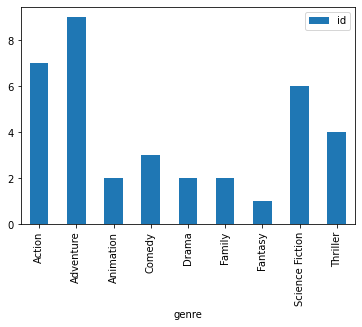

In [102]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', left_on='movie_id', right_on='id')

# Count the number of genres
genre_count =  genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

In [158]:
actors = pd.read_pickle('casts.p')
movies = pd.read_pickle('movies.p')
actor_movies = actors.merge(movies, how='inner', left_on='movie_id', right_on='id')
iron_1_actors = actor_movies[actor_movies['title'] == "Iron Man"].loc[:, ['character', 'id_x', 'name']]
iron_1_actors.rename(columns = {'id_x':'id'}, inplace=True)
iron_2_actors = actor_movies[actor_movies['title'] == "Iron Man 2"].loc[:, ['character', 'id_x', 'name']]
iron_2_actors.rename(columns = {'id_x':'id'}, inplace=True)

In [159]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, how='outer', on='id', suffixes=['_1', '_2'])

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
iron_1_and_2[m].head()

character_1      id           name_1  \
0                                        Yinsen   17857       Shaun Toub   
2                   Obadiah Stane / Iron Monger    1229     Jeff Bridges   
3  Lt. Col. James "Rhodey" Rhodes / War Machine   18288  Terrence Howard   
5                                          Raza   57452      Faran Tahir   
8                                    Abu Bakaar  173810    Sayed Badreya   

  character_2 name_2  
0         NaN    NaN  
2         NaN    NaN  
3         NaN    NaN  
5         NaN    NaN  
8         NaN    NaN

In [160]:
crews = pd.read_pickle('crews.p')

In [162]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', suffixes=['_dir', '_crew'])
crews_self_merged.head()

id department_dir job_dir           name_dir department_crew  \
0  19995        Editing  Editor  Stephen E. Rivkin         Editing   
1  19995        Editing  Editor  Stephen E. Rivkin           Sound   
2  19995        Editing  Editor  Stephen E. Rivkin      Production   
3  19995        Editing  Editor  Stephen E. Rivkin       Directing   
4  19995        Editing  Editor  Stephen E. Rivkin         Writing   

         job_crew          name_crew  
0          Editor  Stephen E. Rivkin  
1  Sound Designer  Christopher Boyes  
2         Casting          Mali Finn  
3        Director      James Cameron  
4          Writer      James Cameron

In [167]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner', suffixes=('_dir','_crew'))
crews_self_merged.head()

id department_dir job_dir           name_dir department_crew  \
0  19995        Editing  Editor  Stephen E. Rivkin         Editing   
1  19995        Editing  Editor  Stephen E. Rivkin           Sound   
2  19995        Editing  Editor  Stephen E. Rivkin      Production   
3  19995        Editing  Editor  Stephen E. Rivkin       Directing   
4  19995        Editing  Editor  Stephen E. Rivkin         Writing   

         job_crew          name_crew  
0          Editor  Stephen E. Rivkin  
1  Sound Designer  Christopher Boyes  
2         Casting          Mali Finn  
3        Director      James Cameron  
4          Writer      James Cameron

In [168]:
# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
direct_crews.head()

id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays

1. You can merge a table to itself with a right join.

2. Merging a table to itself can allow you to compare values in a column to other values in the same column.

3. The pandas module limits you to one merge where you merge a table to itself. You cannot repeat this process over and over.

4. Merging a table to itself is like working with two separate tables.

Answer: 1 (false)

In [202]:
movies = pd.read_pickle('movies.p')
ratings = pd.read_pickle('ratings.p')

In [203]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on="id")

# Print the first few rows/ of movies_ratings
movies_ratings.head()

id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0

In [257]:
sequels = pd.read_pickle('sequels.p')
financials = pd.read_pickle('financials.p')

In [258]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, how='left', on='id')
sequels_fin.head()

id         title  sequel       budget       revenue
0  19995        Avatar    <NA>  237000000.0  2.787965e+09
1    862     Toy Story     863   30000000.0  3.735540e+08
2    863   Toy Story 2   10193   90000000.0  4.973669e+08
3    597       Titanic    <NA>  200000000.0  1.845034e+09
4  24428  The Avengers    <NA>  220000000.0  1.519558e+09

In [259]:
import numpy as np
sequels_fin['sequel'] = sequels_fin['sequel'].replace({pd.NA: np.nan})
#sequels_fin['sequel'].replace({pd.NA: np.nan}, inplace=True)
#sequels_fin['sequel'] = sequels_fin['sequel'].astype('float')

In [260]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner',
                             left_on='sequel', right_on='id', 
                             right_index=True, suffixes=['_org', '_seq'])

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']
orig_seq.head()

sequel  id_org                                          title_org  \
1    863.0     862                                          Toy Story   
30   767.0     675          Harry Potter and the Order of the Phoenix   
32   122.0     121              The Lord of the Rings: The Two Towers   
44   121.0     120  The Lord of the Rings: The Fellowship of the Ring   
55   674.0     673           Harry Potter and the Prisoner of Azkaban   

    sequel_org   budget_org  revenue_org  id_seq                title_seq  \
1        863.0   30000000.0  373554033.0   41439   Saw: The Final Chapter   
30       767.0  150000000.0  938212738.0  256591                    Focus   
32       122.0   79000000.0  926287400.0   49013                   Cars 2   
44       121.0   93000000.0  871368364.0     585           Monsters, Inc.   
55       674.0  130000000.0  789804554.0     395  AVP: Alien vs. Predator   

    sequel_seq   budget_seq  revenue_seq         diff  
1          NaN   20000000.0  136150434.0 -237403599.0  
30         NaN   50100000.0  153962963.0 -784249775.0  
32         NaN  200000000.0  559852396.0 -366435004.0  
44     62211.0  115000000.0  562816256.0 -308552108.0  
55         NaN   70000000.0  171183863.0 -618620691.0

In [261]:
# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
titles_diff.sort_values('diff', ascending=False).head()

title_org                 title_seq  \
2929                        Before Sunrise  The Amazing Spider-Man 2   
1256   Star Trek III: The Search for Spock                The Matrix   
293   Indiana Jones and the Temple of Doom              Man of Steel   
1084                                   Saw          Superman Returns   
1334                        The Terminator          Star Trek Beyond   

             diff  
2929  700182027.0  
1256  376517383.0  
293   329845518.0  
1084  287169523.0  
1334  265100616.0

## 3. Advanced Merging and Concatenating

Answer:

- Merge the left and right table on key column using an inner join.
- Search if the key column in the left table is in the merged tables using .isin() method creating a Boolean Series.
- Subset the rows of the left table.

In [ ]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', how='left', indicator=True)
                            
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge']=='left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

In [ ]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on='gid'))

In [ ]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],sort=True)
print(tracks_from_albums)

# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],ignore_index=True,sort=True)
print(tracks_from_albums)

# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],join='inner',sort=True)
print(tracks_from_albums)

In [ ]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep],keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

artists.merge(albums, on='artid', validate='one_to_many').head()

artists.merge(albums, on='artid', validate='many_to_many').head()

artists.merge(albums, on='artid', validate='many_to_one').head()

Answer: You can use 'many_to_one' without an error, since there is a duplicate key in the left table.

In [ ]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18,pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

## 4. Merging Ordered and Time-Series Data

In [264]:
gdp = pd.read_csv('WorldBank_GDP.csv')
sp500 = pd.read_csv('S&P500.csv')

In [270]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left')

# Print gdp_sp500
gdp_sp500

Country Name Country Code     Indicator Name  Year           GDP    Date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010.0   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010.0   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010.0   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010.0   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011.0   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011.0   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011.0   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011.0   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012.0   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012.0   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012.0   
11  United States          USA  GDP (current US$)  2012  1.619700e+13  2012.0   
12          China          CHN  GDP (current US$)  2012  8.532230e+12  2012.0   
13        Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012.0   
14          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012.0   
15  United States          USA  GDP (current US$)  2012  1.619700e+13  2012.0   
16          China          CHN  GDP (current US$)  2013  9.570410e+12  2013.0   
17        Germany          DEU  GDP (current US$)  2013  3.752510e+12  2013.0   
18          Japan          JPN  GDP (current US$)  2013  5.155720e+12  2013.0   
19  United States          USA  GDP (current US$)  2013  1.678480e+13  2013.0   
20          China          CHN  GDP (current US$)  2014  1.043850e+13  2014.0   
21        Germany          DEU  GDP (current US$)  2014  3.898730e+12  2014.0   
22          Japan          JPN  GDP (current US$)  2014  4.850410e+12  2014.0   
23  United States          USA  GDP (current US$)  2014  1.752170e+13  2014.0   
24          China          CHN  GDP (current US$)  2015  1.101550e+13  2015.0   
25        Germany          DEU  GDP (current US$)  2015  3.381390e+12  2015.0   
26          Japan          JPN  GDP (current US$)  2015  4.389480e+12  2015.0   
27  United States          USA  GDP (current US$)  2015  1.821930e+13  2015.0   
28          China          CHN  GDP (current US$)  2016  1.113790e+13  2016.0   
29        Germany          DEU  GDP (current US$)  2016  3.495160e+12  2016.0   
30          Japan          JPN  GDP (current US$)  2016  4.926670e+12  2016.0   
31  United States          USA  GDP (current US$)  2016  1.870720e+13  2016.0   
32          China          CHN  GDP (current US$)  2017  1.214350e+13  2017.0   
33        Germany          DEU  GDP (current US$)  2017  3.693200e+12  2017.0   
34          Japan          JPN  GDP (current US$)  2017  4.859950e+12  2017.0   
35  United States          USA  GDP (current US$)  2017  1.948540e+13  2017.0   
36          China          CHN  GDP (current US$)  2018  1.360820e+13     NaN   
37        Germany          DEU  GDP (current US$)  2018  3.996760e+12     NaN   
38          Japan          JPN  GDP (current US$)  2018  4.970920e+12     NaN   
39  United States          USA  GDP (current US$)  2018  2.049410e+13     NaN   

    Returns  
0     12.78  
1     12.78  
2     12.78  
3     12.78  
4      0.00  
5      0.00  
6      0.00  
7      0.00  
8     13.41  
9     13.41  
10    13.41  
11    13.41  
12    13.41  
13    13.41  
14    13.41  
15    13.41  
16    29.60  
17    29.60  
18    29.60  
19    29.60  
20    11.39  
21    11.39  
22    11.39  
23    11.39  
24    -0.73  
25    -0.73  
26    -0.73  
27    -0.73  
28     9.54  
29     9.54  
30     9.54  
31     9.54  
32    19.42  
33    19.42  
34    19.42  
35    19.42  
36      NaN  
37      NaN  
38      NaN  
39      NaN

In [271]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left', fill_method='ffill')

# Print gdp_sp500
gdp_sp500

Country Name Country Code     Indicator Name  Year           GDP  Date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012   
11  United States          USA  GDP (current US$)  2012  1.619700e+13  2012   
12          China          CHN  GDP (current US$)  2012  8.532230e+12  2012   
13        Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012   
14          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012   
15  United States          USA  GDP (current US$)  2012  1.619700e+13  2012   
16          China          CHN  GDP (current US$)  2013  9.570410e+12  2013   
17        Germany          DEU  GDP (current US$)  2013  3.752510e+12  2013   
18          Japan          JPN  GDP (current US$)  2013  5.155720e+12  2013   
19  United States          USA  GDP (current US$)  2013  1.678480e+13  2013   
20          China          CHN  GDP (current US$)  2014  1.043850e+13  2014   
21        Germany          DEU  GDP (current US$)  2014  3.898730e+12  2014   
22          Japan          JPN  GDP (current US$)  2014  4.850410e+12  2014   
23  United States          USA  GDP (current US$)  2014  1.752170e+13  2014   
24          China          CHN  GDP (current US$)  2015  1.101550e+13  2015   
25        Germany          DEU  GDP (current US$)  2015  3.381390e+12  2015   
26          Japan          JPN  GDP (current US$)  2015  4.389480e+12  2015   
27  United States          USA  GDP (current US$)  2015  1.821930e+13  2015   
28          China          CHN  GDP (current US$)  2016  1.113790e+13  2016   
29        Germany          DEU  GDP (current US$)  2016  3.495160e+12  2016   
30          Japan          JPN  GDP (current US$)  2016  4.926670e+12  2016   
31  United States          USA  GDP (current US$)  2016  1.870720e+13  2016   
32          China          CHN  GDP (current US$)  2017  1.214350e+13  2017   
33        Germany          DEU  GDP (current US$)  2017  3.693200e+12  2017   
34          Japan          JPN  GDP (current US$)  2017  4.859950e+12  2017   
35  United States          USA  GDP (current US$)  2017  1.948540e+13  2017   
36          China          CHN  GDP (current US$)  2018  1.360820e+13  2017   
37        Germany          DEU  GDP (current US$)  2018  3.996760e+12  2017   
38          Japan          JPN  GDP (current US$)  2018  4.970920e+12  2017   
39  United States          USA  GDP (current US$)  2018  2.049410e+13  2017   

    Returns  
0     12.78  
1     12.78  
2     12.78  
3     12.78  
4      0.00  
5      0.00  
6      0.00  
7      0.00  
8     13.41  
9     13.41  
10    13.41  
11    13.41  
12    13.41  
13    13.41  
14    13.41  
15    13.41  
16    29.60  
17    29.60  
18    29.60  
19    29.60  
20    11.39  
21    11.39  
22    11.39  
23    11.39  
24    -0.73  
25    -0.73  
26    -0.73  
27    -0.73  
28     9.54  
29     9.54  
30     9.54  
31     9.54  
32    19.42  
33    19.42  
34    19.42  
35    19.42  
36    19.42  
37    19.42  
38    19.42  
39    19.42

In [274]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP','Returns']]

# Print gdp_returns correlation
gdp_returns.corr()

GDP   Returns
GDP      1.000000  0.040669
Returns  0.040669  1.000000

In [ ]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, how='inner', on='date')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.show()

In [277]:
gdp = pd.read_csv('WorldBank_GDP.csv')
pop = pd.read_csv('WorldBank_POP.csv')

In [286]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['Year', 'Country Name'], fill_method='ffill')

# Print ctry_date
ctry_date.head()

Country Name Country Code_x Indicator Name_x  Year  GDP Country Code_y  \
0     Afghanistan            NaN              NaN  2010  NaN            AFG   
1         Albania            NaN              NaN  2010  NaN            ALB   
2         Algeria            NaN              NaN  2010  NaN            DZA   
3  American Samoa            NaN              NaN  2010  NaN            ASM   
4         Andorra            NaN              NaN  2010  NaN            AND   

    Indicator Name_y         Pop  
0  Population, total  29185507.0  
1  Population, total   2913021.0  
2  Population, total  35977455.0  
3  Population, total     56079.0  
4  Population, total     84449.0

In [288]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['Country Name', 'Year'], fill_method='ffill')

# Print date_ctry
date_ctry.head()

Country Name Country Code_x Indicator Name_x  Year  GDP Country Code_y  \
0  Afghanistan            NaN              NaN  2010  NaN            AFG   
1  Afghanistan            NaN              NaN  2011  NaN            AFG   
2  Afghanistan            NaN              NaN  2012  NaN            AFG   
3  Afghanistan            NaN              NaN  2012  NaN            AFG   
4  Afghanistan            NaN              NaN  2013  NaN            AFG   

    Indicator Name_y         Pop  
0  Population, total  29185507.0  
1  Population, total  30117413.0  
2  Population, total  31161376.0  
3  Population, total  31161376.0  
4  Population, total  32269589.0

In [ ]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=('', '_wells'), direction='nearest')

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes=('_jpm', '_bac'), direction='nearest')

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

Answer:
    
merge_asof()    -> set to 'forward', fuzzy matching, can fill them in

both            -> suffix for overlapping, ordered or time-series

merge_ordered() -> right join, fill to interpolate

social_fin.query('value > 50000000')

social_fin.query('financial=="total_revenue" and company=="facebook"')

social_fin.query('financial=="net_income" and value < 0')

social_fin.query('financial=="gross_profit" and value > 100')

Answer: There are 6 rows where the net income has a negative value.

In [349]:
gdp = pd.read_csv('WorldBank_GDP.csv')
pop = pd.read_csv('WorldBank_POP.csv')

In [350]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name', 'Year'], fill_method='ffill')
gdp_pop = gdp_pop[gdp_pop.GDP.notna()]
gdp_pop.head()

Country Name Country Code_x   Indicator Name_x  Year           GDP  \
440        China            CHN  GDP (current US$)  2010  6.087160e+12   
441        China            CHN  GDP (current US$)  2011  7.551500e+12   
442        China            CHN  GDP (current US$)  2012  8.532230e+12   
443        China            CHN  GDP (current US$)  2012  8.532230e+12   
444        China            CHN  GDP (current US$)  2012  8.532230e+12   

    Country Code_y   Indicator Name_y           Pop  
440            CHN  Population, total  1.337705e+09  
441            CHN  Population, total  1.344130e+09  
442            CHN  Population, total  1.350695e+09  
443            CHN  Population, total  1.350695e+09  
444            CHN  Population, total  1.350695e+09

In [351]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['GDP'] / gdp_pop['Pop']
gdp_pop

Country Name Country Code_x   Indicator Name_x  Year           GDP  \
440         China            CHN  GDP (current US$)  2010  6.087160e+12   
441         China            CHN  GDP (current US$)  2011  7.551500e+12   
442         China            CHN  GDP (current US$)  2012  8.532230e+12   
443         China            CHN  GDP (current US$)  2012  8.532230e+12   
444         China            CHN  GDP (current US$)  2012  8.532230e+12   
...           ...            ...                ...   ...           ...   
2643     Zimbabwe            USA  GDP (current US$)  2014  2.049410e+13   
2644     Zimbabwe            USA  GDP (current US$)  2015  2.049410e+13   
2645     Zimbabwe            USA  GDP (current US$)  2016  2.049410e+13   
2646     Zimbabwe            USA  GDP (current US$)  2017  2.049410e+13   
2647     Zimbabwe            USA  GDP (current US$)  2018  2.049410e+13   

     Country Code_y   Indicator Name_y           Pop  gdp_per_capita  
440             CHN  Population, total  1.337705e+09    4.550450e+03  
441             CHN  Population, total  1.344130e+09    5.618132e+03  
442             CHN  Population, total  1.350695e+09    6.316918e+03  
443             CHN  Population, total  1.350695e+09    6.316918e+03  
444             CHN  Population, total  1.350695e+09    6.316918e+03  
...             ...                ...           ...             ...  
2643            ZWE  Population, total  1.358668e+07    1.508396e+06  
2644            ZWE  Population, total  1.381463e+07    1.483507e+06  
2645            ZWE  Population, total  1.403039e+07    1.460694e+06  
2646            ZWE  Population, total  1.423674e+07    1.439521e+06  
2647            ZWE  Population, total  1.443902e+07    1.419356e+06  

[2208 rows x 9 columns]

In [352]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pop = gdp_pop[(gdp_pop['Country Name']=='China') | (gdp_pop['Country Name']=="Germany")]
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', index='Year', columns='Country Name')
gdp_pivot

Country Name        China       Germany
Year                                   
2010          4550.450211  41785.501119
2011          5618.132175  46810.349371
2012          6316.918327  44065.200303
2013          7050.649044  46530.867987
2014          7651.344675  48142.870373
2015          8033.357156  41394.666257
2016          8078.757349  42443.430385
2017          8759.047746  44681.030169
2018          9770.881650  48195.588453

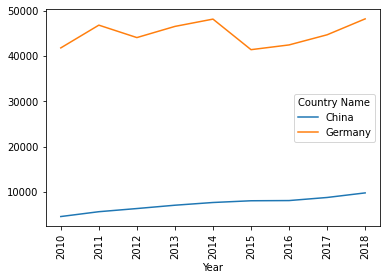

In [353]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('Year >= 2000')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

   country    indicator  year  annual
   
0   Brazil  Inflation %  2017    3.45

1   Canada  Inflation %  2017    1.60

2   France  Inflation %  2017    1.03

3    India  Inflation %  2017    2.49

4   Brazil  Inflation %  2018    3.66

5   Canada  Inflation %  2018    2.27

6   France  Inflation %  2018    1.85

7    India  Inflation %  2018    4.86

8   Brazil  Inflation %  2019    3.73

9   Canada  Inflation %  2019    1.95

10  France  Inflation %  2019    1.11

11   India  Inflation %  2019    7.66

Answer: inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')

In [ ]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date', ascending=True)

# Plot the unempl_rate by date
ur_sorted.plot(kind='line', y='unempl_rate', x='date')
plt.show()

In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=['metric'], var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric=="close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=('_dow', '_bond'))

# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()